# Characterization of Systems in the Spectral Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Bode Plots

The Fourier domain transfer function $H(j \omega)$ characterizes the transmission properties of a linear time-incariant (LTI) system with respect to an [harmonic exponential signal](../continuous_signals/standard_signals.ipynb#Complex-Exponential-Signal) $e^{j \omega t}$ with angular frequency $\omega = 2 \pi f$. In order to illustrate the characteristics of an LTI system, often the magnitude $| H(j \omega) |$ and phase $\varphi_H(j \omega)$ of the transfer function is regarded separately. Decomposing the output signal $Y(j \omega) = X(j \omega) \cdot H(j \omega)$ into its magnitude $| Y(j \omega) |$ and phase $\varphi_Y(j \omega)$ yields

\begin{align}
| Y(j \omega) | &= | X(j \omega) | \cdot | H(j \omega) | \\
\varphi_Y(j \omega) &= \varphi_X(j \omega) + \varphi_H(j \omega)
\end{align}

where $X(j \omega)$ denotes the input signal, and $| X(j \omega) |$ and $\varphi_X(j \omega)$ its magnitude and phase, respectively. It can be concluded from above equations, that the magnitude $| H(j \omega) |$ provides the frequency-dependent attenuation of the magnitude $| X(j \omega) |$ of the input signal by the system, while $\varphi_H(j \omega)$ provides the introduced phase-shift. 

A commonly used graphical illustration of the system properties in terms of the magnitude and phase of the transfer function are [*bode plots*](https://en.wikipedia.org/wiki/Bode_plot). Here the logarithmic magnitude of the transfer function $20 \log_{10} | H(j \omega) |$ in [decibels](https://en.wikipedia.org/wiki/Decibel) is plotted against the logarithm of the frequency $\omega$ or $f$. The phase $\varphi_H(j \omega)$ is plotted linearly against the logarithm of the frequency. A transfer function $H(s)$ which is a rational function in $s$ can be represented [in terms of its poles and zeros](../laplace_transform/definition.ipynb#Representation). Applying this representation to the transfer function $H(j \omega)$ in the Fourier domain yields

\begin{equation}
H(j \omega) = K \cdot \frac{\prod_{\mu=0}^{Q} (j \omega - s_{0 \mu})}{\prod_{\nu=0}^{P} (j \omega - s_{\infty \nu})}
\end{equation}

where $s_{0 \mu}$ and $s_{\infty \nu}$ denote the $\mu$-th zero and $\nu$-th pole of $H(s)$, and $Q$ and $P$ the total number of zeros and poles, respectively. The logarithm of the magnitude and the phase can then be expressed as

\begin{align}
\log_{10} | H(j \omega) | &= \sum_{\mu=0}^{Q} \log_{10} |j \omega - s_{0 \mu}| - \sum_{\nu=0}^{P} \log_{10} |j \omega - s_{\infty \nu}| + \log_{10} |K|   \\
\varphi_H(j \omega) &= \sum_{\mu=0}^{Q} \arg (j \omega - s_{0 \mu}) - \sum_{\nu=0}^{P} \arg (j \omega - s_{\infty \nu})
\end{align}

where $\arg(\cdot)$ denotes the [argument](https://en.wikipedia.org/wiki/Argument_%28complex_analysis%29) (phase) of a complex function. It can be concluded from above result, that the individual contributions of the poles and zeros to the bode plot can be superimposed. This fact can be exploited to sketch approximated bode plots illustrating the properties of an LTI system for a given set of poles and zeros. Rules for the asymptotic behavior of the magnitude and phase for single poles and zeros are available in the [literature](https://en.wikipedia.org/wiki/Bode_plot#Rules_for_handmade_Bode_plot). For instance it is stated that a single pole/zero results in a magnitude response in the bode plot that decreases/increases with a slope of 20 dB per decade. These rules provide insights into the influence of the location and order of poles and zeros on the properties of systems. They are of benefit when designing systems with given magnitude and phase properties.

**Example - Second order low-pass filter**

The bode plot of the [2nd order low-pass filter](../laplace_transform/network_analysis.ipynb#Example:-Second-Order-Low-Pass-Filter) is plotted. The transfer function $H(j \omega)$ of the low-pass filter can be derived from its Laplace domain counterpart $H(s)$ by

\begin{equation}
H(j \omega) = \frac{1}{C L s^2 + C R s + 1} \bigg\rvert_{s = j \omega}
\end{equation}

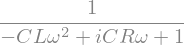

In [1]:
import sympy as sym
%matplotlib inline
sym.init_printing()


s = sym.symbols('s')
w = sym.symbols('omega', real=True)
R, L, C = sym.symbols('R L C', positive=True)

H = 1/(C*L*s**2 + C*R*s + 1)
H = H.subs(s, sym.I * w)
H

The bode plot is generated for the normalized values $R = 1$, $L = 0.5$ and $C = 0.4$

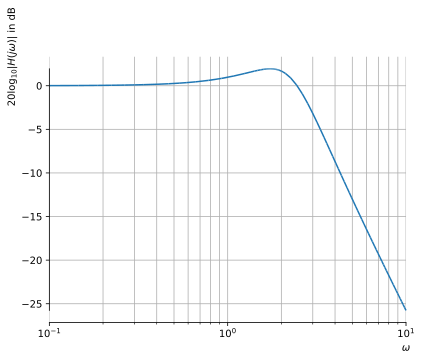

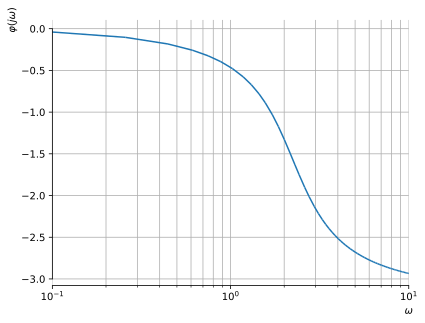

In [2]:
import matplotlib.pyplot as plt
from sympy.plotting.plot import MatplotlibBackend

def logx_plot(Hw, wrange, **kwargs):
    'create plot with logarithmic x-axis'
    p = sym.plot(Hw, wrange, show=False, **kwargs)
    backend = MatplotlibBackend(p)
    backend.process_series()
    backend.ax[0].spines['left'].set_position(('axes', 0))
    backend.ax[0].spines['bottom'].set_position(('axes', 0))
    plt.xscale('log')
    plt.grid(which='both')

def db(x):
    'compute dB value'
    return 20 * sym.log(sym.Abs(x), 10)


RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
logx_plot(db(H.subs(RLC)), (w, 0.1, 10),
          xlabel='$\omega$', ylabel='$20 \log_{10} | H(j \omega) |$ in dB')
logx_plot(sym.arg(H.subs(RLC)), (w, 0.1, 10),
          xlabel='$\omega$', ylabel=r'$\varphi(j \omega)$')

**Example - Second order system**

The bode plot of a second-order LTI system with the following transfer function

\begin{equation}
H(s) = \frac{(s - s_0)(s - s_0^*)}{(s - s_\infty)(s - s_\infty^*)}
\end{equation}

with 

\begin{align}
s_0 &= \sigma_0 + j \omega_0  &\text{with } \quad &\sigma_0 = 2000, \omega_0 = 2 \pi \cdot 100 \\
s_\infty  &= \sigma_\infty + j \omega_\infty & &\sigma_\infty = 20000, \omega_\infty = 2 \pi \cdot 4000
\end{align}

is constructed in this example. First the contribution of the pair of complex conjugate zeros $s_0$ and $s_0^*$ to the magnitude of the transfer function $H(j \omega)$ is computed and plotted over the frequency $f$ using $\omega = 2 \pi f$.

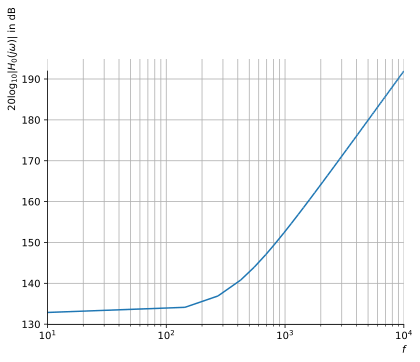

In [3]:
f = sym.symbols('f', real=True)
s = sym.I * 2*sym.pi*f
s_0 = 2000 + sym.I * 2*sym.pi*100

H1 = (s - s_0)*(s - sym.conjugate(s_0))
Hlog1 = db(H1)
logx_plot(Hlog1, (f, 10, 10000), xlabel='$f$',
          ylabel='$20 \log_{10} |H_0(j \omega)|$ in dB')

Now the contribution of the pair of complex conjugate poles $s_\infty$ and $s_\infty^*$ is computed and plotted

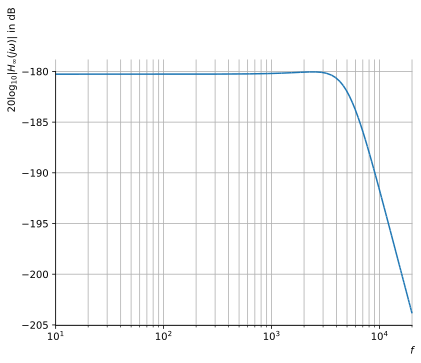

In [4]:
s_inf = 20000 + sym.I * 2*sym.pi*4000

H2 = 1/((s - s_inf)*(s - sym.conjugate(s_inf)))
Hlog2 = db(H2)
logx_plot(Hlog2, (f, 10, 20000), xlabel='$f$',
          ylabel='$20 \log_{10} |H_\infty(j \omega)|$ in dB')

The (logarithmic) magnitude frequency response of the system is given by superposition of the individual contributions from the zeros and the poles

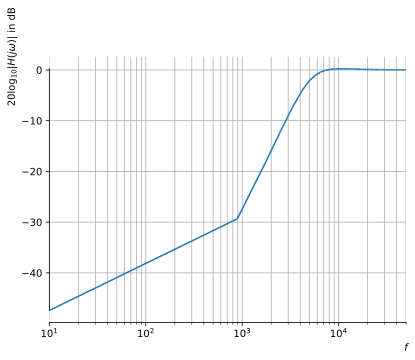

In [5]:
Hlog = Hlog1 + Hlog2
logx_plot(Hlog, (f, 10, 50000), xlabel='$f$',
          ylabel='$20 \log_{10} |H(j \omega)|$ in dB')

**Exercise**

* Examine the bode plots for the contributions of the zero and the pole:
    * What regions show approximately linear behavior over the frequency $f$? 
    * What is the slope of these regions per octave/decade? 
    * At which frequency is the transition between the regions of linear behavior? How is the frequency related to the imaginary part of the zero/pole?

* Examine the bode plot of the system. How is it related to the bode plots of the individual zero/pole?

* Move the pole and/or zero closer to the imaginary axis by changing the values $\sigma_\infty$ and/or $\sigma_0$. What changes?

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.